In [1]:
#Set up the environment and upload the data
from sklearn.preprocessing import StandardScaler
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
from skimage.transform import resize
import pandas as pd
from matplotlib.image import imread
from skimage.io import imread_collection
from PIL import Image
import seaborn as sns
from sklearn import decomposition, preprocessing, svm
import sklearn.metrics as metrics #confusion_matrix, accuracy_score
from time import sleep 
from tqdm.notebook import tqdm
import os
sns.set()

In [4]:
#Dataset that should go with Alzheimer label
very_mild = glob(r'C:\Desktop\AIML\Alzheimer_Disease\Dataset\Dataset\Very_Mild_Demented\*')
mild = glob(r'C:\Desktop\AIML\Alzheimer_Disease\Dataset\Dataset\Mild_Demented\*')
moderate = glob(r'C:\Desktop\AIML\Alzheimer_Disease\Dataset\Dataset\Moderate_Demented\*')

#Dataset without Alzheimer
non = glob(r'C:\Desktop\AIML\Alzheimer_Disease\Dataset\Dataset\Non_Demented\*')

One of the data in Non Alzheimer Folder
Image shape: (128, 128)


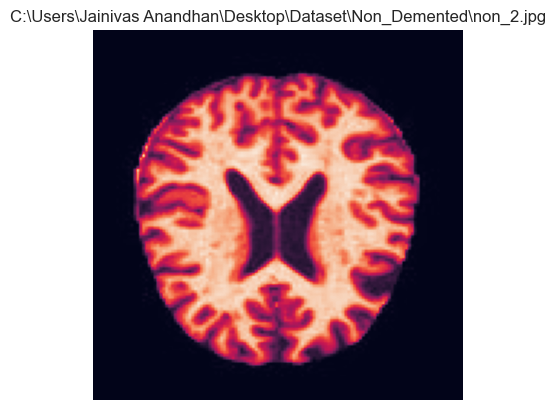

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Assuming non and moderate are lists of file paths
non = [r"C:\Desktop\AIML\Alzheimer_Disease\Dataset\Dataset\Non_Demented\non.jpg", r"C:\Desktop\AIML\Alzheimer_Disease\Dataset\Dataset\Non_Demented\non_2.jpg", ...]
moderate = [r"C:\Desktop\AIML\Alzheimer_Disease\Dataset\Dataset\Moderate_Demented\moderate.jpg", r"C:\Desktop\AIML\Alzheimer_Disease\Dataset\Dataset\Moderate_Demented\moderate_2.jpg", ...]

def view_image(directory):
    img = mpimg.imread(directory)
    plt.imshow(img)
    plt.title(directory)
    plt.axis('off')
    print(f'Image shape: {img.shape}')
    plt.show()  # Display the image

print('One of the data in Non Alzheimer Folder')
view_image(non[1])  # Assuming non[1] is a valid image file path

Alzheimer Patient's Brain
Image shape: (128, 128)


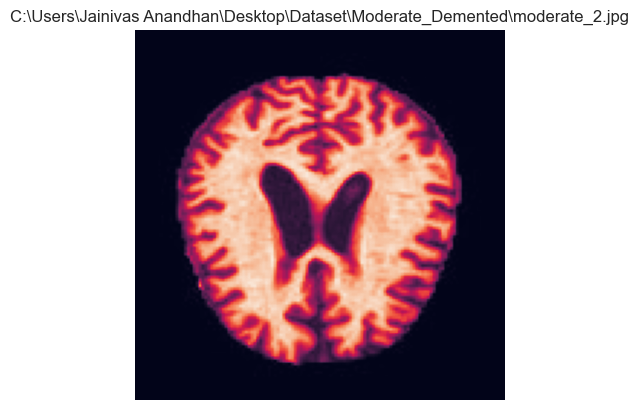

In [6]:
print('Alzheimer Patient\'s Brain')
view_image(moderate[1])  # Assuming moderate[1] is a valid image file path

In [7]:
import os
from PIL import Image
import numpy as np

# List where arrays shall be stored
resized_image_array = []
# List that will store the corresponding labels (0 for non, 1 for others)
resized_image_array_label = []

width = 256
height = 256
new_size = (width, height)

# Define the paths to image directories
very_mild = r"C:\Desktop\AIML\Alzheimer_Disease\Dataset\Dataset\Very_Mild_Demented"
mild = r"C:\Desktop\AIML\Alzheimer_Disease\Dataset\Dataset\Mild_Demented"
moderate = r"C:\Desktop\AIML\Alzheimer_Disease\Dataset\Dataset\Moderate_Demented"
non = r"C:\Desktop\AIML\Alzheimer_Disease\Dataset\Dataset\Non_Demented"

# Iterate over pictures and resize them to 256 by 256
def resizer(image_directory, label):
    for file in os.listdir(image_directory):
        img_path = os.path.join(image_directory, file)
        img = Image.open(img_path)
        img = img.resize(new_size)
        array_temp = np.array(img)
        shape_new = width * height
        img_wide = array_temp.reshape(1, shape_new)
        resized_image_array.append(img_wide[0])
        resized_image_array_label.append(label)  # Append the label for this image

# Resize images and populate arrays
resizer(non, 0)  # Label 0 for "non" category
resizer(very_mild, 1)  # Label 1 for "very_mild" category
resizer(mild, 1)  # Label 1 for "mild" category
resizer(moderate, 1)  # Label 1 for "moderate" category

# Combine image directories for "ALZ" category
ALZ = [very_mild, mild, moderate]
for directory in ALZ:
    resizer(directory, 1)  # Label 1 for "ALZ" category


In [8]:
from sklearn.model_selection import train_test_split

# Print the lengths of non and ALZ to verify the number of images
print(len(non))  # Number of images in "non" category
print(len(ALZ))  # Number of images in other categories combined

# Print the total number of resized images and check an example image
print(len(resized_image_array))  # Total number of resized images
print(resized_image_array[1])  # Check an example image (numpy array representation)

# Split the data into training and testing sets
train_x, test_x, train_y, test_y = train_test_split(resized_image_array, resized_image_array_label, test_size=0.2)

# Print the sizes of the training and testing sets
print(f"Training data size: {len(train_x)}")
print(f"Testing data size: {len(test_x)}")


55
3
9600
[0 0 0 ... 0 0 0]
Training data size: 7680
Testing data size: 1920


In [9]:
#Train a SVM using RBF kernel
clf = svm.SVC(kernel = 'rbf')
clf.fit(train_x, train_y)

#store predictions and ground truth
y_pred = clf.predict(train_x)
y_true = train_y

#assess the performance of the SVM with linear kernel on Training data
print('Accuracy : ', metrics.accuracy_score(y_true, y_pred))
print('Precision : ', metrics.precision_score(y_true, y_pred))
print('Recall : ', metrics.recall_score(y_true, y_pred))
print('f1 : ', metrics.f1_score(y_true, y_pred)) 
print('Confusion matrix :')
print(metrics.confusion_matrix(y_true, y_pred))

Accuracy :  0.8798177083333333
Precision :  0.8608815426997245
Recall :  0.9775171065493646
f1 :  0.9154994049253867
Confusion matrix :
[[1757  808]
 [ 115 5000]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Create a mesh grid to cover the feature space
x_min, x_max = train_x[:, 0].min() - 1, train_x[:, 0].max() + 1
y_min, y_max = train_x[:, 1].min() - 1, train_x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict the class labels for each point in the mesh grid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundaries and the training data
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(train_x[:, 0], train_x[:, 1], c=train_y, cmap=plt.cm.coolwarm)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary (Training Data)')
plt.show()

In [ ]:
#Now, use the SVM model to predict Test data
y_pred = clf.predict(test_x)
y_true = test_y

#assess the performance of the SVM with linear kernel on Testing data
print('Accuracy : ', metrics.accuracy_score(y_true, y_pred))
print('Precision : ', metrics.precision_score(y_true, y_pred))
print('Recall : ', metrics.recall_score(y_true, y_pred))
print('f1 : ', metrics.f1_score(y_true, y_pred)) 
print('Confusion matrix :')
print(metrics.confusion_matrix(y_true, y_pred))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create a mesh grid to cover the feature space
x_min, x_max = test_x[:, 0].min() - 1, test_x[:, 0].max() + 1
y_min, y_max = test_x[:, 1].min() - 1, test_x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict the class labels for each point in the mesh grid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundaries and the testing data
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(test_x[:, 0], test_x[:, 1], c=test_y, cmap=plt.cm.coolwarm)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary (Testing Data)')
plt.show()

In [ ]:
!pip install joblib

In [2]:
import joblib

# Assuming 'clf' is your trained SVM model
# Save the trained model to a file
joblib.dump(clf, 'svm_model.pkl')



In [ ]:
from PIL import Image
import numpy as np
import joblib  # Use joblib to load your trained SVM model

# Load your trained SVM model
clf = joblib.load('svm_model.pkl')

# Function to preprocess the uploaded image
def preprocess_uploaded_image(image_path):
    img = Image.open(image_path)
    img = img.resize((256, 256))  # Resize to 256x256 pixels (adjust as needed)
    img_array = np.array(img)  # Convert to numpy array
    img_array = img_array.reshape(1, -1)  # Flatten the image array
    return img_array

# Function to check if uploaded image is detected as Alzheimer's
def check_uploaded_image(image_path, model):
    img_array = preprocess_uploaded_image(image_path)
    prediction = model.predict(img_array)[0]
    if prediction == 1:
        result = "Detected as Alzheimer's"
    else:
        result = "Not detected as Alzheimer's"
    return result

# Example usage (replace 'path/to/your/image.jpg' with the actual path):
uploaded_image_path = r'C:\Desktop\AIML\Alzheimer_Disease\Dataset\Dataset\Non_Demented\non_12.jpg'
detection_result = check_uploaded_image(uploaded_image_path, clf)

print("Detection Result:", detection_result)


ALZHEIMER CLASSIFIER

In [ ]:
import os

# List where arrays shall be stored
resized_image_array = []
resized_image_array_label = []

width = 256
height = 256
new_size = (width, height)

# Define the paths to image directories
very_mild = r"C:\Desktop\AIML\Alzheimer_Disease\Dataset\Dataset\Very_Mild_Demented"
mild = r"C:\Desktop\AIML\Alzheimer_Disease\Dataset\Dataset\Mild_Demented"
moderate = r"C:\Desktop\AIML\Alzheimer_Disease\Dataset\Dataset\Moderate_Demented"
non = r"C:\Desktop\AIML\Alzheimer_Disease\Dataset\Dataset\Non_Demented"

# Iterative function to resize images and populate arrays
def resizer(image_directory, label):
    for file in os.listdir(image_directory):
        img_path = os.path.join(image_directory, file)
        img = Image.open(img_path)
        img = img.resize(new_size)
        array_temp = np.array(img)
        shape_new = width * height
        img_wide = array_temp.reshape(1, shape_new)
        resized_image_array.append(img_wide[0])
        resized_image_array_label.append(label)

# Resize images and populate arrays
resizer(non, 0)  # Non-Demented label: 0
resizer(very_mild, 1)  # Very Mild Demented label: 1
resizer(mild, 2)  # Mild Demented label: 2
resizer(moderate, 3)  # Moderate Demented label: 3

# Convert lists to numpy arrays
resized_image_array = np.array(resized_image_array)
resized_image_array_label = np.array(resized_image_array_label)

In [ ]:
#split the data to test and training
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(resized_image_array, resized_image_array_label, test_size = 0.2)

# Print the sizes of the training and testing sets
print(f"Training data size: {len(train_x)}")
print(f"Testing data size: {len(test_x)}")

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Train a SVM using RBF kernel
clf = svm.SVC(kernel='rbf')
clf.fit(train_x, train_y)

# Store predictions and ground truth for training data
y_pred_train = clf.predict(train_x)
y_true_train = train_y

# Assess the performance of the SVM on training data
print('Training Data Performance:')
print('Accuracy:', accuracy_score(y_true_train, y_pred_train))
print('Precision:', precision_score(y_true_train, y_pred_train))
print('Recall:', recall_score(y_true_train, y_pred_train))
print('F1 Score:', f1_score(y_true_train, y_pred_train))
print('Confusion Matrix:')
print(confusion_matrix(y_true_train, y_pred_train))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Create a mesh grid to cover the feature space
x_min, x_max = train_x[:, 0].min() - 1, train_x[:, 0].max() + 1
y_min, y_max = train_x[:, 1].min() - 1, train_x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict the class labels for each point in the mesh grid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundaries and the training data
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(train_x[:, 0], train_x[:, 1], c=train_y, cmap=plt.cm.coolwarm)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary (Training Data)')
plt.show()

In [ ]:
# Use the SVM model to predict test data
y_pred_test = clf.predict(test_x)
y_true_test = test_y

# Assess the performance of the SVM on testing data
print('\nTesting Data Performance:')
print('Accuracy:', accuracy_score(y_true_test, y_pred_test))
print('Precision:', precision_score(y_true_test, y_pred_test, average='weighted'))
print('Recall:', recall_score(y_true_test, y_pred_test, average='weighted'))
print('F1 Score:', f1_score(y_true_test, y_pred_test, average='weighted'))
print('Confusion Matrix:')
print(confusion_matrix(y_true_test, y_pred_test))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create a mesh grid to cover the feature space
x_min, x_max = test_x[:, 0].min() - 1, test_x[:, 0].max() + 1
y_min, y_max = test_x[:, 1].min() - 1, test_x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict the class labels for each point in the mesh grid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundaries and the testing data
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(test_x[:, 0], test_x[:, 1], c=test_y, cmap=plt.cm.coolwarm)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary (Testing Data)')
plt.show()

In [ ]:
import joblib

# Assuming 'clf' is your trained SVM model
# Save the trained model to a file
joblib.dump(clf, 'svm_model2.pkl')

In [ ]:
from PIL import Image
import numpy as np
import joblib

# Load the trained SVM model
clf = joblib.load('svm_model2.pkl')

# Function to preprocess the image
def preprocess_image(image_path, width, height):
    # Open the image
    img = Image.open(image_path)
    # Resize the image to match the dimensions used during training
    img_resized = img.resize((width, height))
    # Convert the image to a numpy array
    img_array = np.array(img_resized)
    # Flatten the image array
    img_flat = img_array.flatten()
    return img_flat

# Define the paths to the image you want to classify
image_path = r'C:\Desktop\AIML\Alzheimer_Disease\Dataset\Dataset\Mild_Demented\mild_100.jpg'  # Replace this with the path to your image

# Preprocess the image
image = preprocess_image(image_path, width, height)

# Use the trained SVM model to predict the category
predicted_category = clf.predict(image.reshape(1, -1))[0]

# Map the predicted category to a human-readable label
category_labels = {0: "Non-Demented", 1: "Very Mild Demented", 2: "Mild Demented", 3: "Moderate Demented"}
predicted_label = category_labels[predicted_category]

# Display the predicted category
print("Predicted Category:", predicted_label)